## Módulo 1: Fundamentos de Aprendizado de Máquina

por Otávio Muraca

## Objetivo do Projeto

Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco). Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez.



## Importações

In [77]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pydotplus

from scipy.optimize import curve_fit

from sklearn import neighbors, datasets, metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_confusion_matrix

from six import StringIO

from IPython.display import Image
import sys

#Removendo possíveis warningns
import warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [12]:
#Importando CSV
dados = pd.read_csv('winequality-red.csv', sep=';')

## Análise Inicial

In [13]:
dados.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
#Tamanhos do dataset
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 1599 linhas e 12 colunas


In [15]:
#Tipos das colunas do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
#Verificando valores nulos
dados.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
#analisando as "estatísticas do dataset"
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
#Mediana
np.median(dados['residual sugar'])

2.2

In [23]:
#Observando os valores únicos de QUALITY
dados['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [24]:
#Observando a FREQUÊNCIA dos valores únicos de QUALITY
dados['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Correlações

In [20]:
#Verificando a CORRELAÇÃO
dados.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

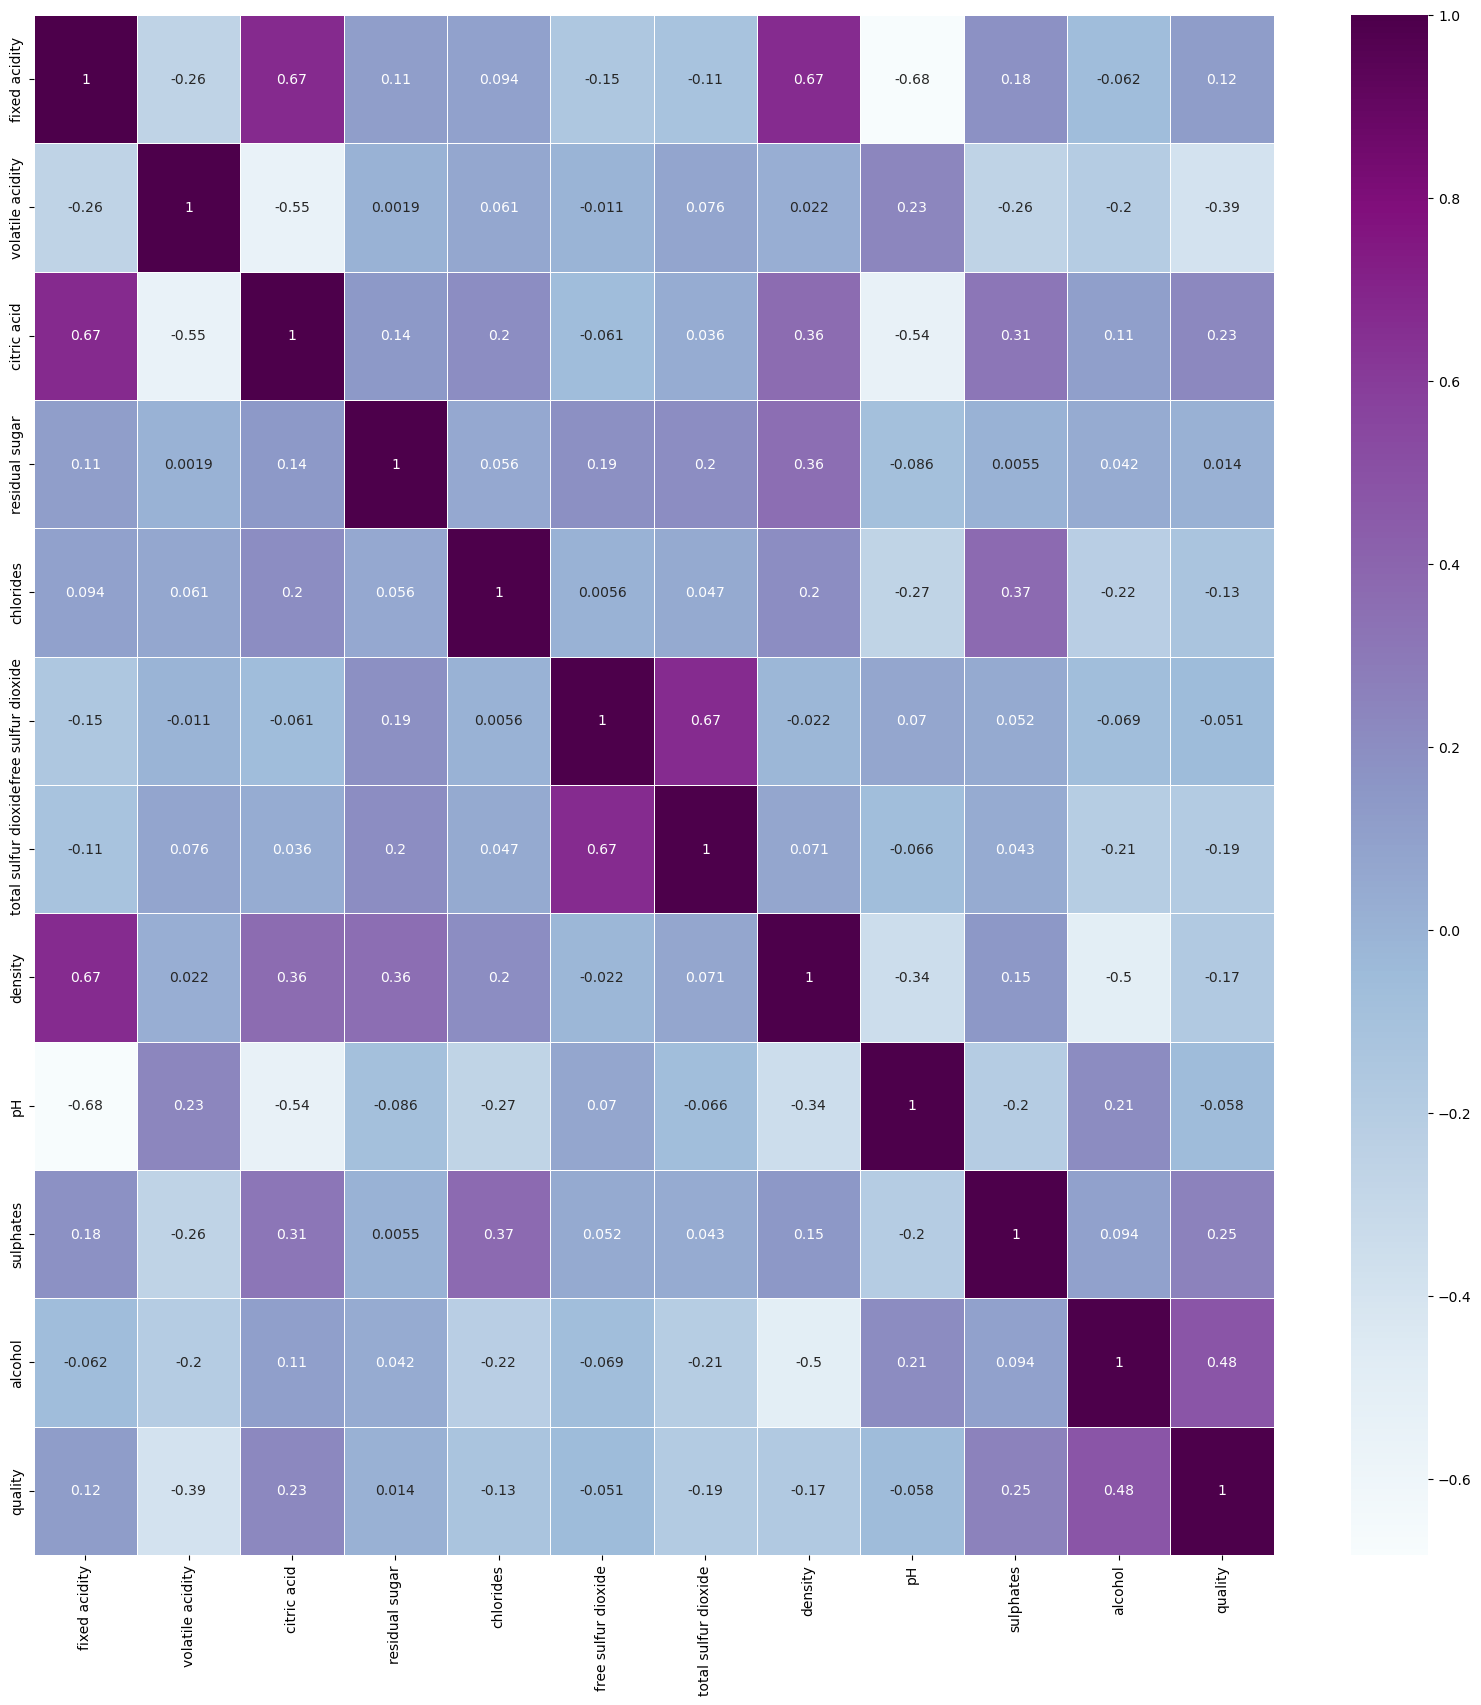

In [21]:
#Gerando Gráfico de CORRELAÇÃO
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(dados.corr(), annot= True, linewidths= 0.5, cmap = 'BuPu')

## Coeficiente de Relações

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

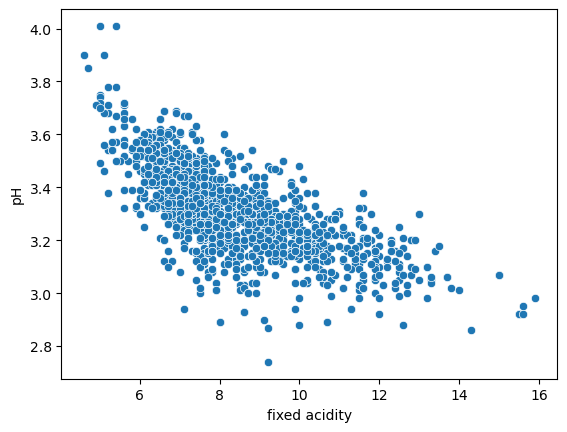

In [27]:
#Coeficiente de correlação de Pearson FIXED ACIDITY x pH
sns.scatterplot(data = dados, x="fixed acidity", y = "pH" )

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

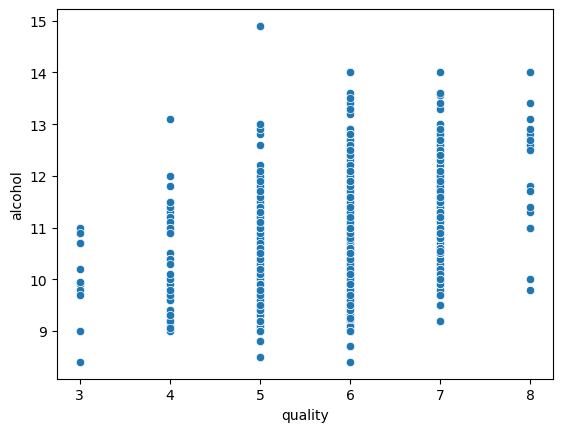

In [28]:
#Coeficiente de correlação de Pearson QUALITY x ALCOHOL
sns.scatterplot(data = dados, x="quality", y = "alcohol")

## Escalas do dataset

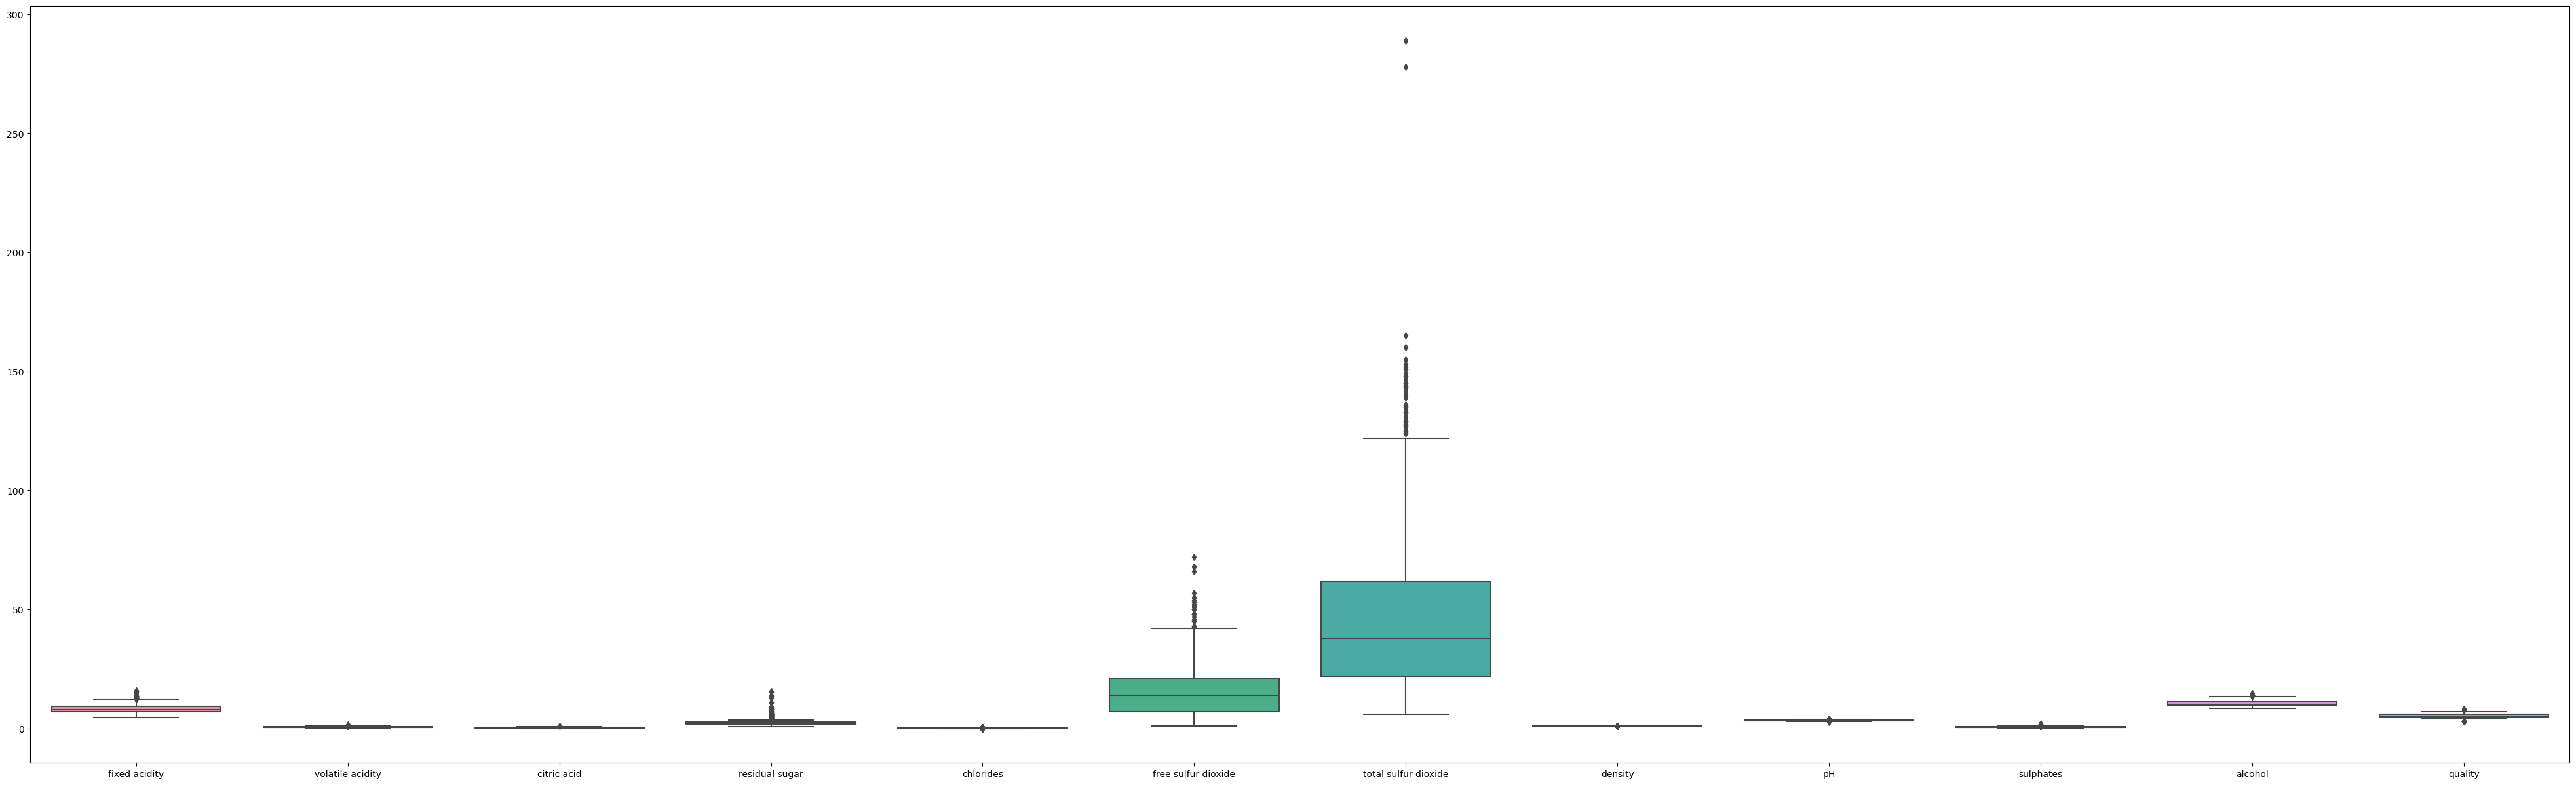

In [42]:
#Verificando as Escalas
fig, ax = plt.subplots(figsize=(50,15))
teste = sns.boxplot(data=dados)

É possível observar a diferença na escalada dos dados. Essa diferença pode atrapalhar no desempenho dos algoritmos de Machine Learning. Para reverter essa situação, aplicaremos um método de padronização de dados, MinMaxScaler.


In [43]:
#Ajustando o método de Escala
scaler = MinMaxScaler()

#Duplicando o dataset
dadosCopy = pd.DataFrame(dados, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

transformed_dataset = scaler.fit_transform(dadosCopy.drop('quality', axis=1).values)

dadosEscalado = pd.DataFrame(data=transformed_dataset, columns = dadosCopy.columns.drop('quality'))
dadosEscalado = pd.concat([dadosEscalado, dadosCopy['quality']], axis=1)
dadosEscalado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


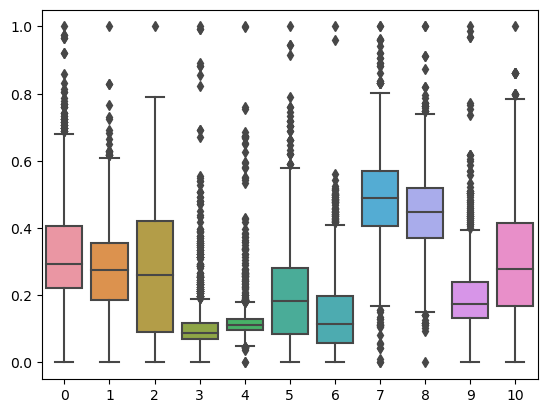

In [45]:
teste = sns.boxplot(data=transformed_dataset)

Após a sua normalização, conseguimos ver melhor sua escala entre 0 e 1. Agora todos os dados possuem a mesma escala, possibilitando assim, um melhor desempenho dos algoritmos de Machine Learning.

## Divisão dos dados TESTE / TREINAMENTO

In [46]:
#Transformando os dados em array
x = dadosEscalado.iloc[:,0:-1].values #Selecionando as colunas com as características
y = dadosEscalado.iloc[:,11].values #Selecionando a coluna com a qualidade final

In [47]:
#Realiza a divisão dos dados entre TREINAMENTO e TESTE (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.30)

## KNN

In [64]:
#Treina o modelo KNN
classifier = KNeighborsClassifier(n_neighbors=5) #5vizinhos
classifier.fit(x_train, y_train)

#Realiza a previsão
y_pred = classifier.predict(x_test)

#Realiza a previsão
y_pred = classifier.predict(x_test)

#Vendo a ACURÁCIA do algoritmos
print(classification_report(y_test, y_pred))
print(f'A acurácia do algorítmo KNN foi de {round(accuracy_score(y_test, y_pred),2)}% \n')

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480

A acurácia do algorítmo KNN foi de 0.56% 



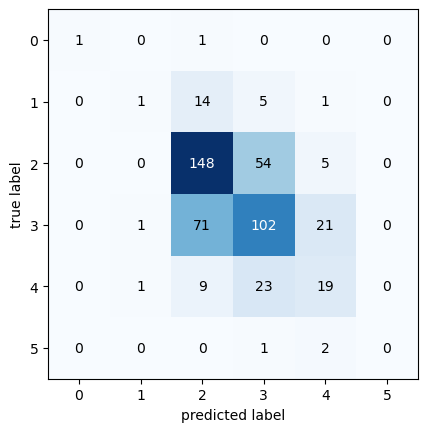

In [51]:
#Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test,y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()


## Árvore de Decisão

In [65]:
#Cria o objeto de classificação
clf = DecisionTreeClassifier()

#realiza o treinamento do classificador 
clf = clf.fit(x_train, y_train)

#Realiza a previsão de classificaçao
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
print(f'A acurácia do algorítmo KNN foi de {round(accuracy_score(y_test, y_pred),2)}% \n')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.05      0.05        21
           5       0.65      0.70      0.67       207
           6       0.60      0.53      0.56       195
           7       0.46      0.58      0.51        52
           8       0.20      0.33      0.25         3

    accuracy                           0.58       480
   macro avg       0.33      0.36      0.34       480
weighted avg       0.58      0.58      0.58       480

A acurácia do algorítmo KNN foi de 0.58% 



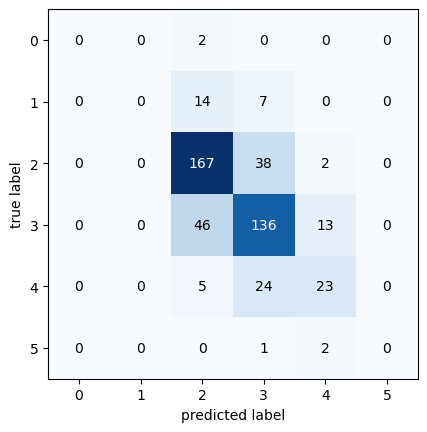

In [69]:
#Realiza o plot da Matriz de Confusão
matriz_confusao = confusion_matrix(y_test,y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

## Algoritmo Floresta Randônica

In [67]:
#Cria o objeto de classificação
clfr = RandomForestClassifier(max_depth=10, random_state=1)

#realiza o treinamento do classificador 
clfr = clfr.fit(x_train, y_train)

#Realiza a previsão de classificaçao
y_pred = clfr.predict(x_test)

print(classification_report(y_test, y_pred))
print(f'A acurácia do algorítmo KNN foi de {round(accuracy_score(y_test, y_pred),2)}% \n')
     

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480

A acurácia do algorítmo KNN foi de 0.68% 



In [ ]:
#Cria o plot da Floresta Randômica

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled = True, rounded = True,
                special_characters=True,
                class_names=['0','1','2','3','4','5'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## SVM

In [70]:
#Cria o objeto SVM
clf_svm =SVC(gamma='auto',kernel='rbf')

#Realiza a classificação via SVM
clf_svm = clf_svm.fit(x_train,y_train)

#Realiza a previsão de classificação
y_pred = clf_svm.predict(x_test)

print(classification_report(y_test, y_pred))
print(f'A acurácia do algorítmo KNN foi de {round(accuracy_score(y_test, y_pred),2)}% \n')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.61      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.49      0.59      0.53       480

A acurácia do algorítmo KNN foi de 0.59% 



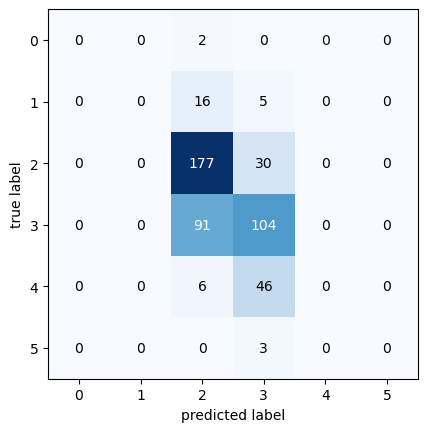

In [71]:
#Avalia o modelo

#Realiza o plot da MC
matriz_confusao = confusion_matrix(y_test,y_pred)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.savefig('SVM')
plt.show()

## Redes Neurais

In [72]:
#Algoritmo Rede MLP
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print(classification_report(y_test, y_pred))
print(f'A acurácia do algorítmo KNN foi de {round(accuracy_score(y_test, y_pred),2)}% \n')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480

A acurácia do algorítmo KNN foi de 0.6% 



## Sistema Binário

Foi solicitado testar os mesmos algorítmos no mesmo dataset, porém com os valores de saída em formato BINÁRIO (0 e 1).

In [73]:
dadosBinarios = dadosEscalado

#transformando os valores de saída da coluna 'quality' em 0 e 1
def binarios(dado):
  if (dado == 6) or (dado == 7) or (dado == 8):
    return 1
  elif (dado == 3) or (dado == 4) or (dado == 5):
    return 0

In [74]:
dadosBinarios['quality'] = dadosBinarios['quality'].apply(binarios)

In [75]:
dadosBinarios.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


In [76]:
#Transformando os dados em array
x = dadosBinarios.iloc[:,0:-1].values #colunas características
y = dadosBinarios.iloc[:,11].values #qualidades

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.30)

scaler = MinMaxScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


dadosMinMax = MinMaxScaler().fit(dadosBinarios)
dadosMinMaxData = dadosMinMax.transform(dadosBinarios)



modelos = ["KNeighborsClassifier(n_neighbors=5)",
  "DecisionTreeClassifier()",
  "RandomForestClassifier(max_depth=10, random_state=1)",
  "SVC(gamma='auto',kernel='rbf')",
  "MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)"]

for i in modelos:
  modelo = i.replace('"','')
  x = eval(modelo)
  clf = x.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  acuracia = accuracy_score(y_test, y_pred)
  
  print(f'{i} = {round(acuracia,2)}')

KNeighborsClassifier(n_neighbors=5) = 0.69
DecisionTreeClassifier() = 0.76
RandomForestClassifier(max_depth=10, random_state=1) = 0.8
SVC(gamma='auto',kernel='rbf') = 0.74
MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1) = 0.74


### - fim -